# `Komoot Data Analyst Extra Miles`

> #### This small analysis aims to estimate if the sentiment of the last tweets mentionning 'komoot' are rather positive or negative.<br>
> #### In order to do that, we will: 
> - scrap the latest tweet mentionning 'komoot' using selenium
> - estimate the sentiment around 'komoot' thanks to the textblob package

In [1]:
# library import
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from textblob import TextBlob
import matplotlib as plt

%matplotlibplotlib inline

In [3]:
browser = webdriver.Chrome()

In [39]:
base_url = u'https://twitter.com/search?q='
query = u'komoot&src=typd'
url = base_url + query

In [40]:
browser.get(url)

time.sleep(1)

In [41]:
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

for _ in range(500):
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(0.2)

In [42]:
tweets = browser.find_elements_by_class_name('tweet-text')

In [43]:
df_tmp = pd.DataFrame(columns=['text', 'polarity', 'subjectivity'])
for tweet in tweets:
    analysis = TextBlob(tweet.text)
    df_data = {'text': tweet.text, 'polarity' : analysis.sentiment.polarity, 'subjectivity' : analysis.sentiment.subjectivity}
    df_tmp = df_tmp.append(df_data, ignore_index = True)

In [44]:
df_tmp.head()

,text,polarity,subjectivity
0,Will the @GarminUK Vivoactive 3 Music every ge...,0.000000,0.000000
1,"Hi Phil, this is currently not possible becaus...",0.333333,0.633333
2,"Hi Steven, which app version are you using - i...",1.000000,0.300000
3,Bye bye Canary Islands See you next time for...,-0.100000,0.250000
4,"Super dupa woooo hoooo. Go, go Jenny",0.333333,0.666667


Relying on the last 40 tweets mentioning komoot, the polarity median is 0.27


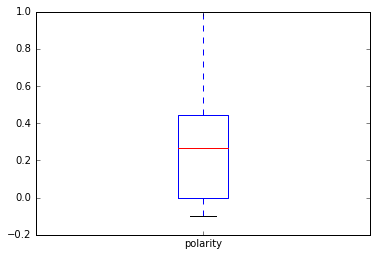

In [49]:
df_tmp.polarity.plot.box()
print('Relying on the last ' + str(df_tmp.text.count()) + ' tweets mentioning komoot, the polarity median is ' + str(round(df_tmp.polarity.median(), 2)))

### `Insights`
> - A median polarity around 0.3 for the last 40 tweets tends to demonstrate positive feelings around Komoot on Twitter!

In [53]:
byebye = TextBlob("Thank you for your time, I hope to get the chance to share a discussion with you!")
print(byebye.translate(to='de'))

Vielen Dank für Ihre Zeit, ich hoffe, dass Sie die Gelegenheit haben, eine Diskussion mit Ihnen zu teilen!
